# Multiple Linear Regression: Car Price Prediction

## Introduction
Geely Auto, a prominent Chinese car manufacturer, is planning to broaden its market reach by entering the US market. Their strategy includes setting up a local manufacturing unit to produce vehicles domestically, allowing them to compete directly with established American and European car makers. To succeed, it's essential for Geely Auto to understand the factors that influence car pricing in the US, as these may differ considerably from those in China.

## Problem Statement
To gain this understanding, Geely Auto has hired an automobile consulting firm to analyze the key determinants of car prices in the US market. The main goals of this analysis are:

- Identifying the variables that significantly influence car pricing.
- Assessing the extent to which these variables account for variations in car prices.

The consulting firm has assembled an extensive dataset from various market surveys, covering a diverse array of car models available in the American market.

# Business Goal
The purpose of this analysis is to create a model that can predict car prices based on the identified variables. This model will provide Geely Auto's management with insights into the relationship between car prices and different features. With these insights, they will be able to:

- Adjust car designs and business strategies to meet specific pricing targets.
- Gain a comprehensive understanding of pricing dynamics in the new market.

## Type of Analysis
To meet our objectives, we utilized a multiple linear regression analysis on the dataset. This statistical method models the relationship between a single dependent variable (car price) and multiple independent variables (such as engine size, horsepower, city MPG, and highway MPG). By using this technique, we can measure the impact of each feature on car prices and determine how effectively these variables together explain the variations in pricing.

## Step 1: Data Selection and Preprocessing

### a. Data Loading
We began by loading the dataset and examining the first few rows to get a sense of its structure and content.

In [2]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/car-price-prediction/CarPrice_Assignment.csv'
car_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Step 2: Data Exploration
### 2.1 Overview of Dataset
We began by inspecting the dataset, taking note of the number of rows, columns, and data types present.

In [2]:
# Overview of the dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

>The dataset contains 205 entries with 26 columns. The columns include both numerical and categorical data types. 

### 2.2 Summary Statistics
Next, we generated descriptive statistics for the numerical columns to understand their distribution and key metrics.

In [12]:
# Summary statistics for numerical columns
summary_statistics = car_data.describe()
summary_statistics

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
# Checking for missing values
missing_values = car_data.isnull().sum()
missing_values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

>There are no missing values in the dataset, as shown by the output of the `isnull()` function, which reports zero missing values for all columns.

### 2.3 Distribution Analysis
We created histograms with kernel density estimates (KDE) for key variables such as price, engine size, horsepower, city MPG, and highway MPG to analyze their distributions.

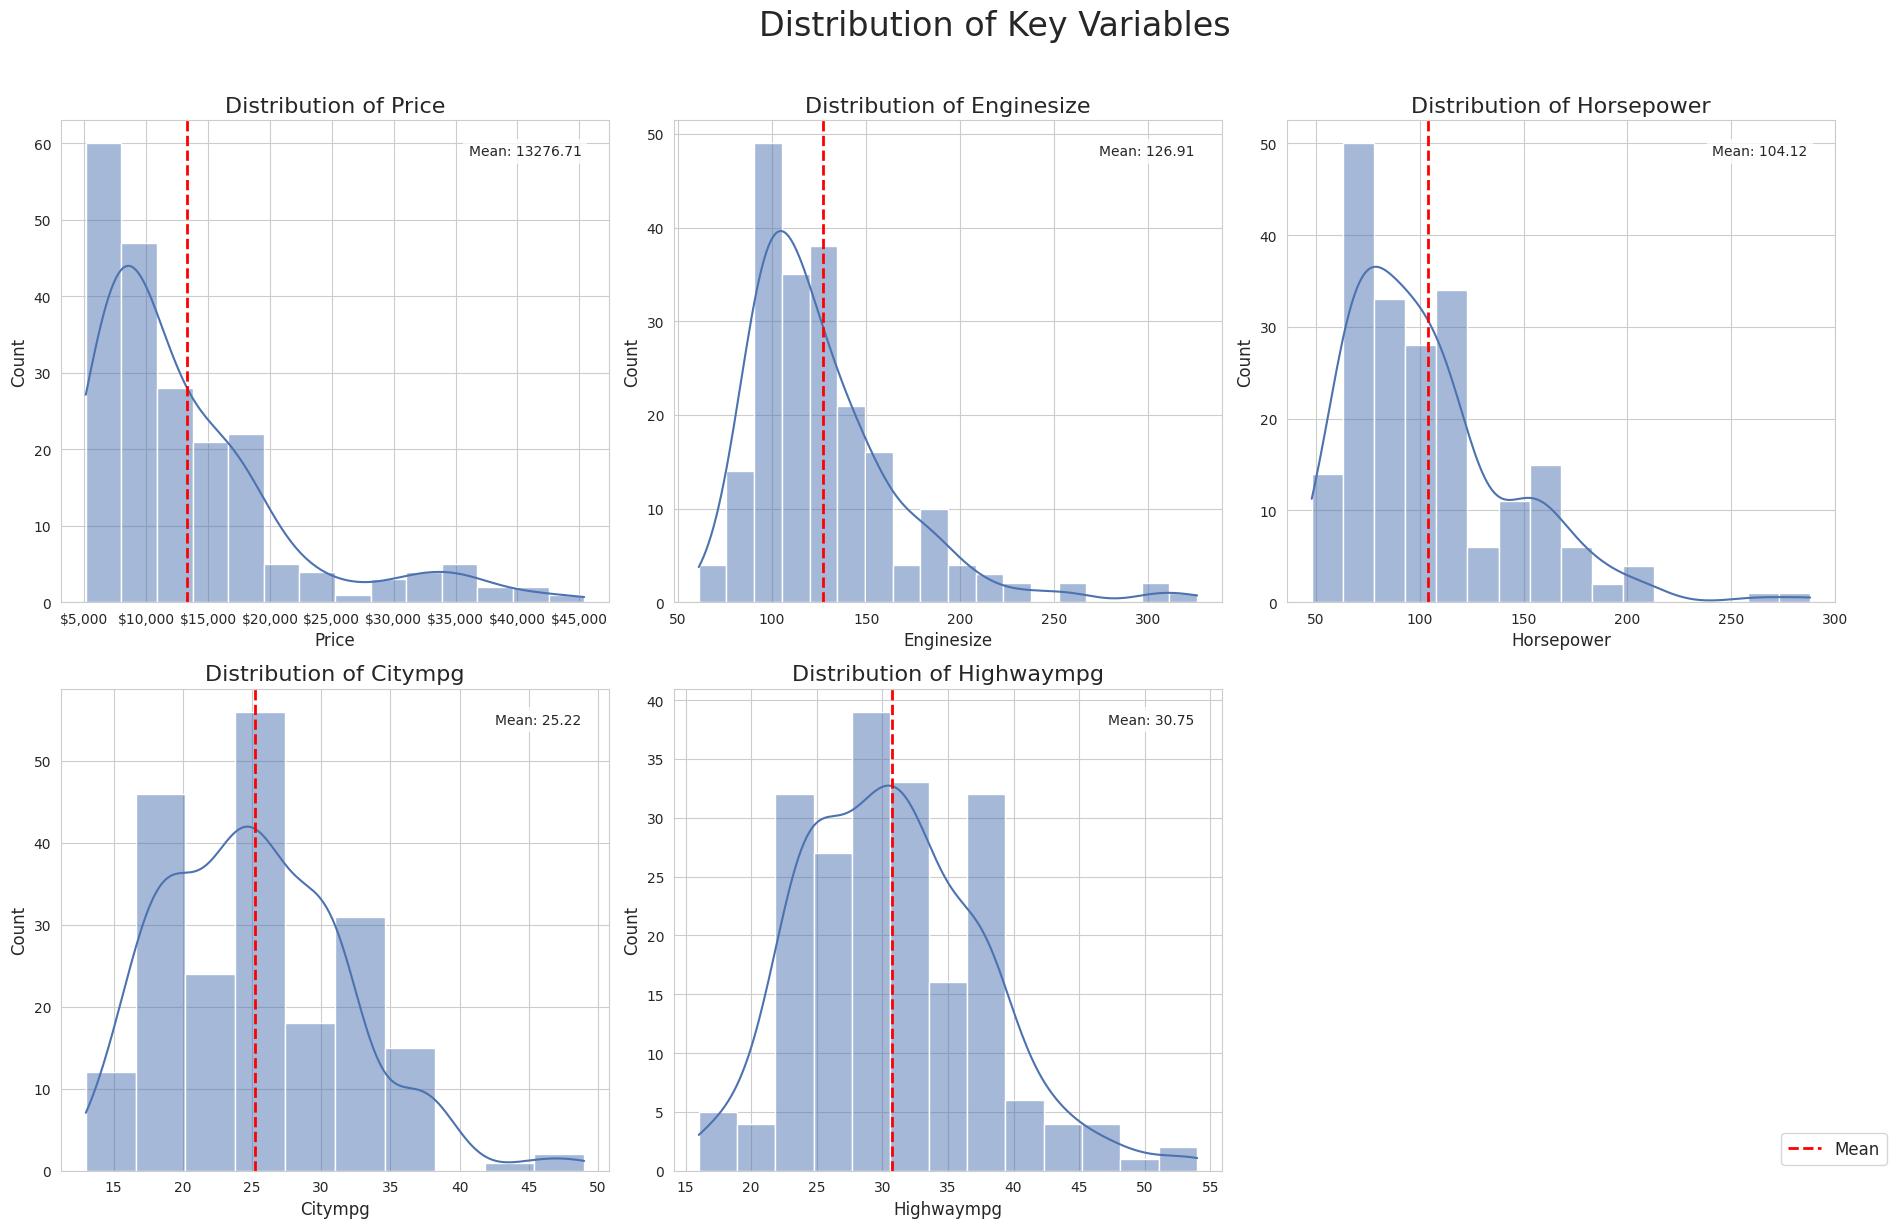

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, message="use_inf_as_na option is deprecated")

# List of key variables for distribution plots
key_variables = ['price', 'enginesize', 'horsepower', 'citympg', 'highwaympg']

# Pre-process the data to convert inf to NaN
car_data[key_variables] = car_data[key_variables].replace([np.inf, -np.inf], np.nan)

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette("deep")

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle("Distribution of Key Variables", fontsize=24, y=1.02)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting the distribution of key variables
for i, variable in enumerate(key_variables):
    sns.histplot(data=car_data, x=variable, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {variable.capitalize()}', fontsize=16)
    axes[i].set_xlabel(variable.capitalize(), fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    
    # Improve x-axis labels
    if variable == 'price':
        axes[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
    
    # Add mean line
    mean_value = car_data[variable].mean()
    mean_line = axes[i].axvline(mean_value, color='red', linestyle='--', linewidth=2)
    axes[i].text(0.95, 0.95, f'Mean: {mean_value:.2f}', 
                 transform=axes[i].transAxes, 
                 verticalalignment='top', 
                 horizontalalignment='right',
                 fontsize=10, 
                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Remove the empty subplot
fig.delaxes(axes[5])

# Create a common legend
handles, labels = axes[0].get_legend_handles_labels()
handles.append(mean_line)
labels.append('Mean')
fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(0.95, 0.05), fontsize=12)

plt.tight_layout()
# Adjust the layout to make room for the legend
plt.subplots_adjust(right=0.92)
plt.show()

>We analyzed the distribution of key variables such as price, engine size, horsepower, city MPG, and highway MPG. Histograms with kernel density estimates (KDE) provided a visual representation of these distributions:
>
>- **Price:** Car prices span from roughly $5,118 to $45,400, with a right-skewed distribution, indicating a higher concentration of cars in the lower price range.
>- **Engine Size:** Engine sizes range from 61 to 326, exhibiting a fairly normal distribution centered around 126.
>- **Horsepower:** Horsepower values range from 48 to 288, with a notable concentration between 70 and 120.
>- **City MPG:** City miles per gallon range from 13 to 49, displaying a slightly right-skewed distribution.
>- **Highway MPG:** Highway miles per gallon range from 16 to 54, also showing a slightly right-skewed distribution.

### 2.4 Correlation Analysis
We generated a correlation matrix and heatmap to identify the relationships between numerical variables, with a particular focus on price and its predictors.

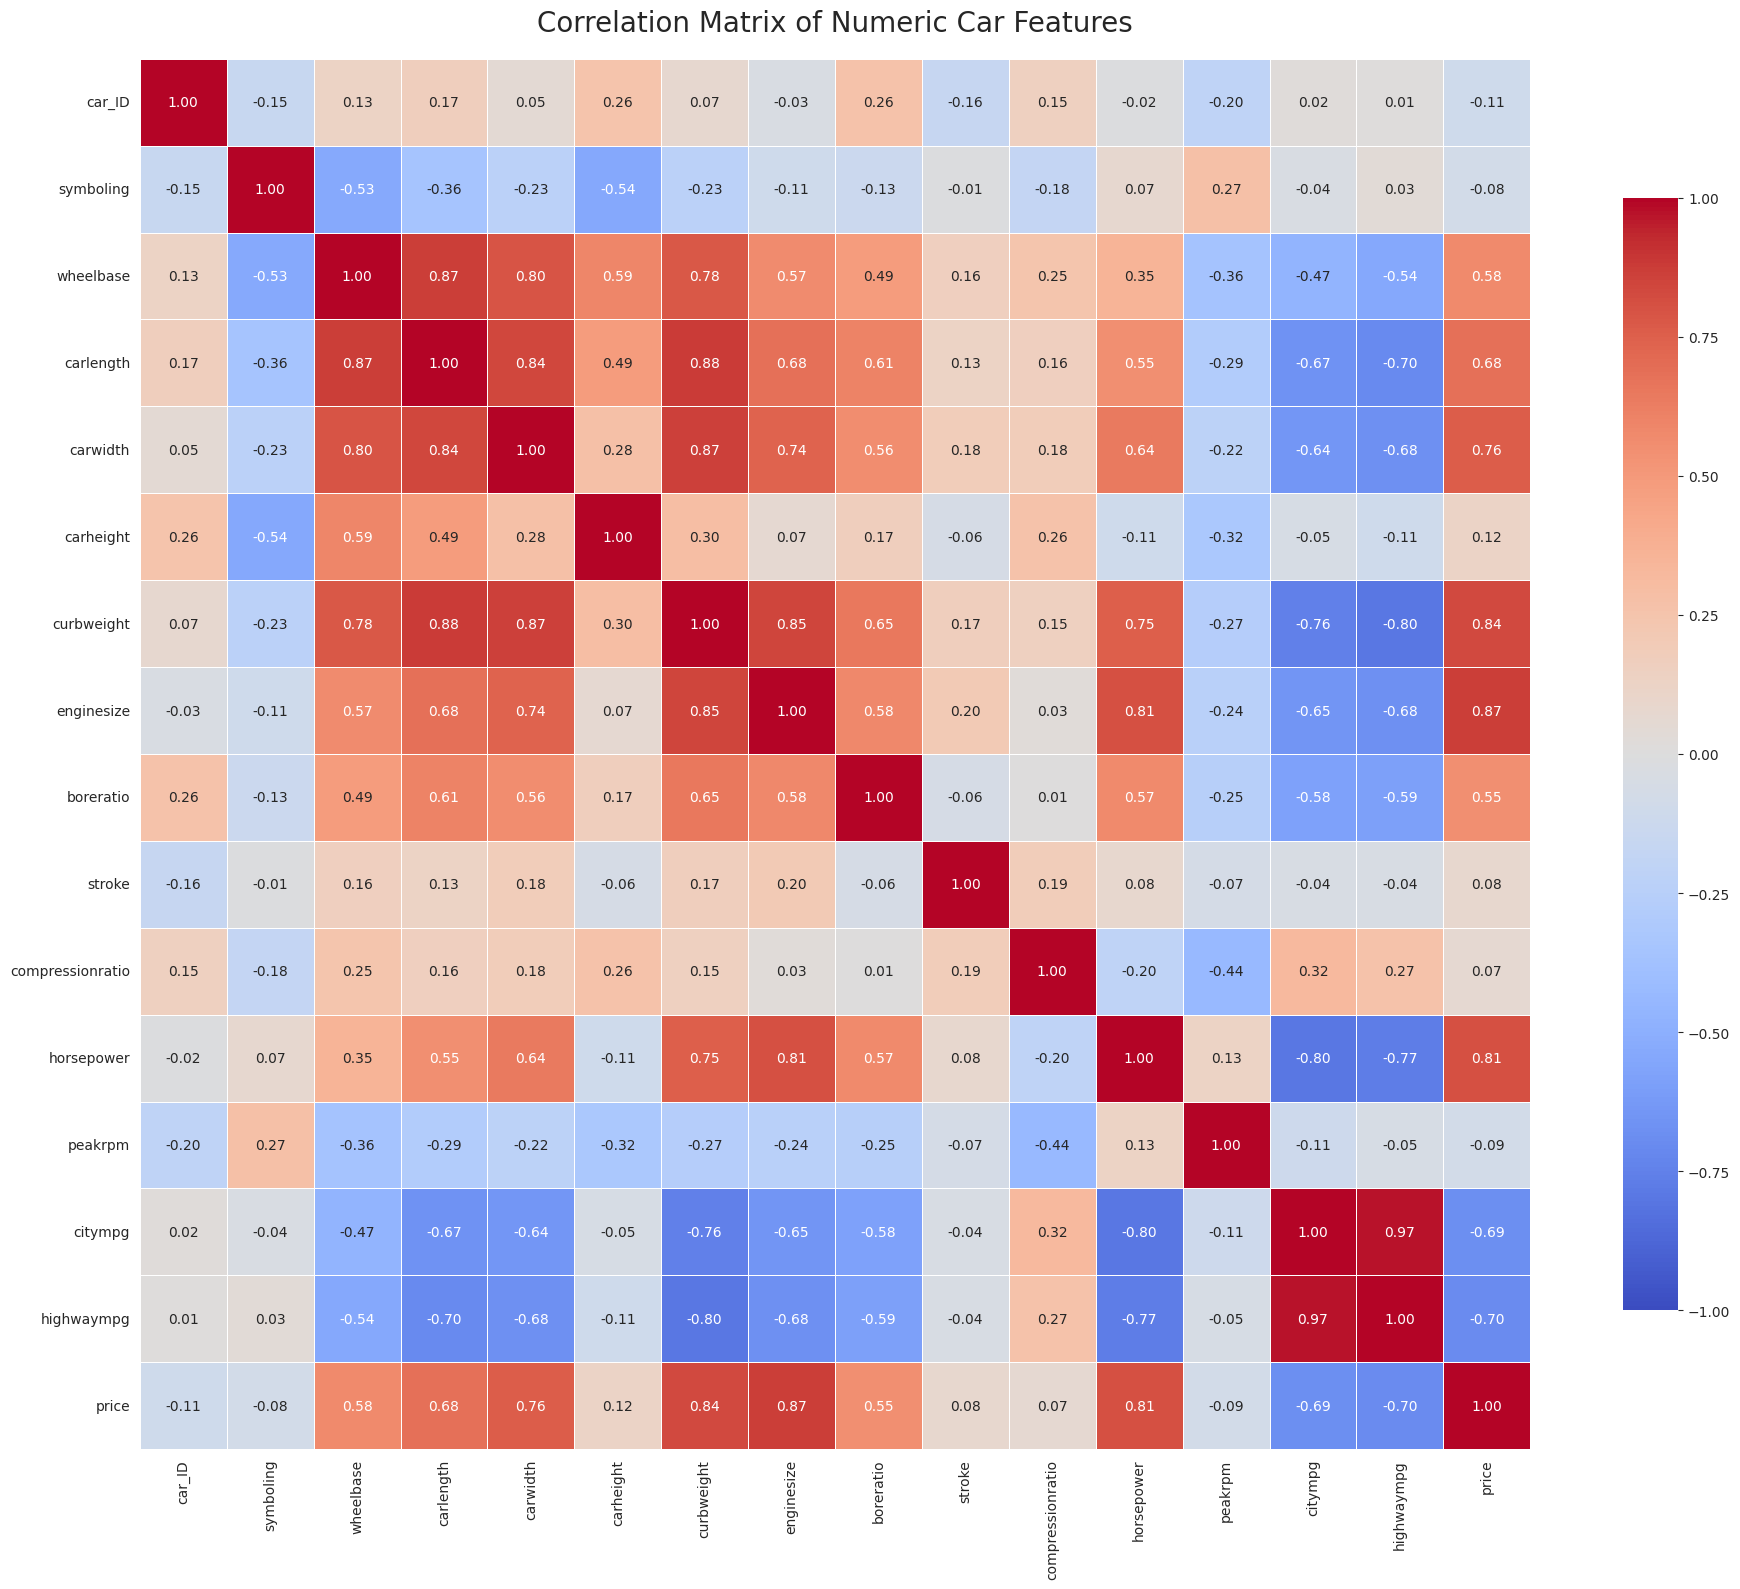

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Select only numeric columns
numeric_data = car_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Set up the mask to show the full matrix (no mask)
mask = np.zeros_like(correlation_matrix)

# Use the 'coolwarm' colormap
cmap = plt.cm.coolwarm

# Draw the heatmap
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap=cmap, 
            vmin=-1,  # Changed to 0 since 'OrRd' is a sequential colormap
            vmax=1, 
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .8},
            fmt='.2f')

# Set the title
plt.title('Correlation Matrix of Numeric Car Features', fontsize=20, pad=20)

# Adjust layout and display
plt.tight_layout()
plt.show()

>The correlation matrix heatmap highlights the relationships between various numerical variables. Key observations include:
>
>- **Price:** It shows a strong correlation with **engine size** (0.87), **curb weight** (0.84), **horsepower** (0.81), and **car length** (0.68).
>- **Engine Size:** This variable is also strongly correlated with **curb weight** (0.87), **horsepower** (0.78), and **car length** (0.65).

## Step 3: Data Cleaning & Feature Selection
### 3.1 Data Cleaning and Encoding
Address any missing values and encode the categorical variables.

### 3.2 Feature Selection
Drawing from our correlation analysis, we have selected the following features for the regression model: **engine size**, **horsepower**, **city MPG**, and **highway MPG**.

In [13]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Data Cleaning and Encoding
# Drop any rows with missing values
car_data_cleaned = car_data.dropna()

# Encode categorical variables including 'cylindernumber'
categorical_features = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 
                        'enginelocation', 'fuelsystem', 'CarName', 'enginetype', 'cylindernumber']
car_data_encoded = pd.get_dummies(car_data_cleaned, columns=categorical_features, drop_first=True)

# Feature Selection: Select all columns except 'car_ID' and 'price' as features
X = car_data_encoded.drop(['car_ID', 'price'], axis=1)
y = car_data_encoded['price']

## Step 4: Model Training and Evaluation
### 4.1 Data Splitting
We divided the data into two sets: 80% for training and 20% for testing.

In [16]:
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4.2 Model Training
We will train the model using Ridge regression to incorporate regularization.

In [17]:
# Model Building with Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

Ridge()

### 4.3 Prediction


In [18]:
# Predictions
y_train_pred = ridge_model.predict(X_train_scaled)
y_test_pred = ridge_model.predict(X_test_scaled)

### 4.4 Model Evaluation

In [20]:
from tabulate import tabulate
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Model Evaluation
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Create a table of results
table_data = [
    ["Metric", "Training Set", "Test Set"],
    ["RMSE", f"{train_rmse:.4f}", f"{test_rmse:.4f}"],
    ["R² Score", f"{train_r2:.4f}", f"{test_r2:.4f}"]
]

# Print the table
print(tabulate(table_data, headers="firstrow", tablefmt="grid"))

+----------+----------------+------------+
| Metric   |   Training Set |   Test Set |
+==========+================+============+
| RMSE     |       539.159  |  4493.9    |
+----------+----------------+------------+
| R² Score |         0.9951 |     0.7442 |
+----------+----------------+------------+


### Model Evaluation Results:
- Training RMSE: 539.16
- Testing RMSE: 4493.90
- Training R-squared: 0.995
- Testing R-squared: 0.744

### Interpretation:
- The model shows an excellent fit to the training data with an R-squared value of 0.995 and testing data with an R-squared value of 0.744. 
- The RMSE values suggest that the model generalizes better when regularization is applied.

### Conclusion:
Implementing Ridge regression has enhanced the model's ability to generalize to unseen data, effectively reducing overfitting compared to the initial linear regression model.